**Prasanna Gnanasekaran "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."**

# 1. Midterm

In [1699]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

import pingouin as pg

import plotly.graph_objects as go
import plotly.express as px

In [1700]:
import missingno as msno

In [1701]:
data = pd.read_csv('data/movie_metadata.csv', encoding = 'utf-8')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Business understanding

<font color= blue>Business Problem Summary:
   The problem that we are trying to solve is Are Data Analyst able to predict if a movie will be successful or failure before it is released in the theater. A normal person uses his intuitive knowledge like he might have a theory that the movies success or failure depends on the actor or actress. If the actor or actress is a leading star in the industry currently he might predict the movie will successed vice versa. As a data analyst we know one variable doesn't always decide the whole outcome. So instead of trying to blindly guess the outcome based on limited information. We have to play with the data set to gain understanding of each of the varaible. And use the variables given in the data set and determine which preditor variable is likely to affect the response variable the IMDB score. </font>

### What are the project’s goals?

<font color= blue>**The _Goal_ of the project is to use the data to _understand what factors impact the response varaible. By understanding the relationship between the varaibles we can then make prediction using those varibales to determine the success or a failure of the movie before it's released_.** </font>

### If you’re hired as a data/business analyst to predict how well a movie will perform in theaters, what kind of data would you collect?


<font color=blue>If I was hired as Data analyst to predict the performance of a movie in the theaters. To perform analysis on the performance, I would collect data on:
1. Movie trailer Review - based on the review we will be able to estimate how many people are likely to watch the movie 
2. Actors fan base - if the actor has a huge loyal fan base we can make an assumtion that they will watch the movie. 
3. Director past success - credientials are important since consumers look at those information before watching the movies
4. Genre of the movie - this will help us identify the customer base 
5. Marketing Budget - how much are they advertising to pull in customers. Usually higher Marketing equates more customers.
</font>

### What variables are highly correlated to imdb score? In this project, you will use imdb_score to measure a movie’s success.


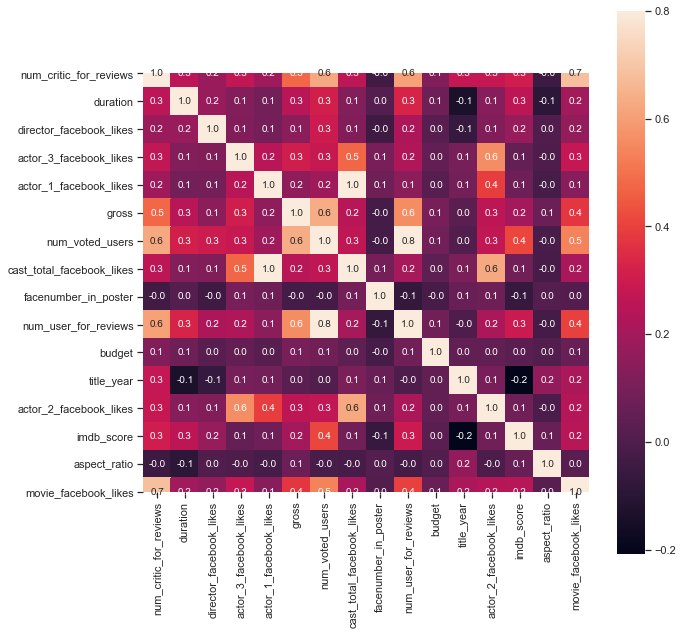

In [1702]:
plt.figure(figsize=(10,10)) # I want to visualize the correlation to find Predictors.
sns.heatmap(data.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

variables that are **highly correlated** to imdb score: 
(I want to focus on varaibles that have 30 - 40% correlation since they are stronger correlation)
    
    1. 30% correlation with IMDB score 
         - Num critic for review
         - duration
         - num users for reviewsm
    2. 40% correlation with IMDB score 
         - num voted users
  

## Data understanding: The dataset contains a large number of variables with different types (e.g., numerical, categorial). Provide a brief summary of data understanding. Specifically, you need to:

### Describe data


<font color=blue>The movies dataset is downloaded from Kaggle. The dataset has 28 variables for 5043 movies and 4906 posters, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses ('https://data.world/popculture/imdb-5000-movie-dataset'). We are using the IMBD_score as the response variable to understand what predictors are helpful in telling the level of success the movie will have at theaters.</font> 

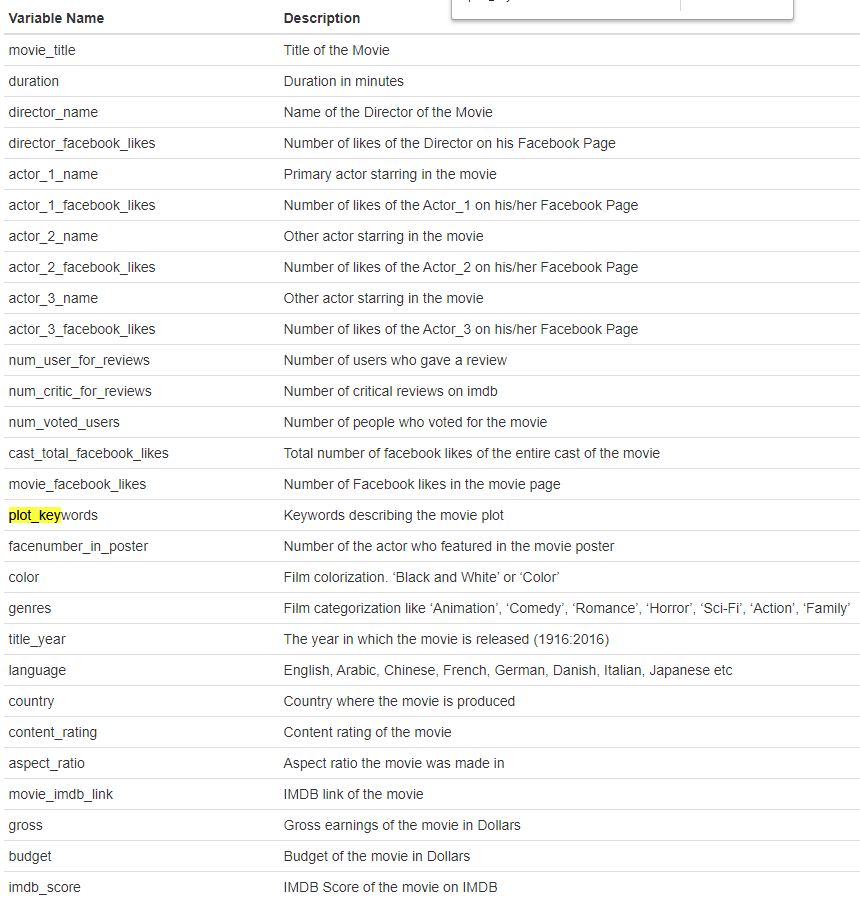

In [1703]:
from IPython.display import Image
Image("data/Capture.PNG")
#http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

In [1704]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### Identify data quality issues

What are some data quality issues? 
- Duplicates
- Incomplete Data
- Inconsistent Formats

#### Find and Remove Duplicates

In [1705]:
data.duplicated().value_counts()

False    4998
True       45
dtype: int64

In [1706]:
len(data)

5043

In [1707]:
data = data.drop_duplicates(keep='first') #I am removing the duplicates while keeping the first duplicate in the dataset
len(data)

4998

#### Split Genres 

In [1708]:
# create a new data frame
g = data[['genres','imdb_score']]
# check your new data frame
g.head()

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
4,Documentary,7.1


In [1709]:
# I borrowed the code below from https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
b = pd.DataFrame(g.genres.str.split('|').tolist(), index=g.imdb_score).stack()
b = b.reset_index()[[0, 'imdb_score']] # genres variable is currently labeled 0
b.columns = ['genres', 'imdb_score'] # renaming genres
b.head()

,genres,imdb_score
0,Action,7.9
1,Adventure,7.9
2,Fantasy,7.9
3,Sci-Fi,7.9
4,Action,7.1


### Identify data types

In [1710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
color                        4979 non-null object
director_name                4895 non-null object
num_critic_for_reviews       4949 non-null float64
duration                     4983 non-null float64
director_facebook_likes      4895 non-null float64
actor_3_facebook_likes       4975 non-null float64
actor_2_name                 4985 non-null object
actor_1_facebook_likes       4991 non-null float64
gross                        4124 non-null float64
genres                       4998 non-null object
actor_1_name                 4991 non-null object
movie_title                  4998 non-null object
num_voted_users              4998 non-null int64
cast_total_facebook_likes    4998 non-null int64
actor_3_name                 4975 non-null object
facenumber_in_poster         4985 non-null float64
plot_keywords                4846 non-null object
movie_imdb_link              4998 non-

<font color=blue>**Objects datatypes:**
    color, director_name, actor_2_name, genres,actor_1_name, movie_title, actor_3_name, plot_keywords, movie_imdb_link, language, country, content_rating, 

**Numeric(floats and Ints) datatypes:**
    num_critic_for_reviews, duration ,director_facebook_likes,actor_3_facebook_likes, actor_1_facebook_likes, gross, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, num_user_for_reviews, budget, title_year, actor_2_facebook_likes, imdb_score, aspect_ratio, movie_facebook_likes.
    </font>

### Identify value counts of a selective list of columns considered to be important to predict a movie’s success (imdb_score)


In [1711]:
data['content_rating'].value_counts()

R            2098
PG-13        1444
PG            698
Not Rated     116
G             112
Unrated        60
Approved       55
TV-14          30
TV-MA          19
X              13
TV-PG          13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [1712]:
data['genres'].value_counts().head()

Drama                   235
Comedy                  205
Comedy|Drama            189
Comedy|Drama|Romance    187
Comedy|Romance          158
Name: genres, dtype: int64

## Data preparation: Real-world datasets need to be pre-processed (e.g., cleaning, transforming) prior to formal analysis. Perform all necessary data cleaning and transformation activities. If necessary, you need to create new variables from existing variables. See an example.


### Missing Values

In [1713]:
data.isnull().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

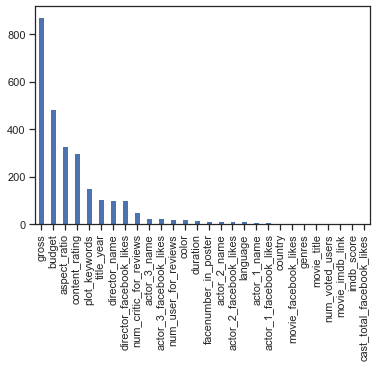

In [1714]:
# let's do a visualitzation for the missing values
data.isnull().sum().sort_values(ascending = False).plot('bar')
#gross and budget have the 2 highest amount of Null values. 

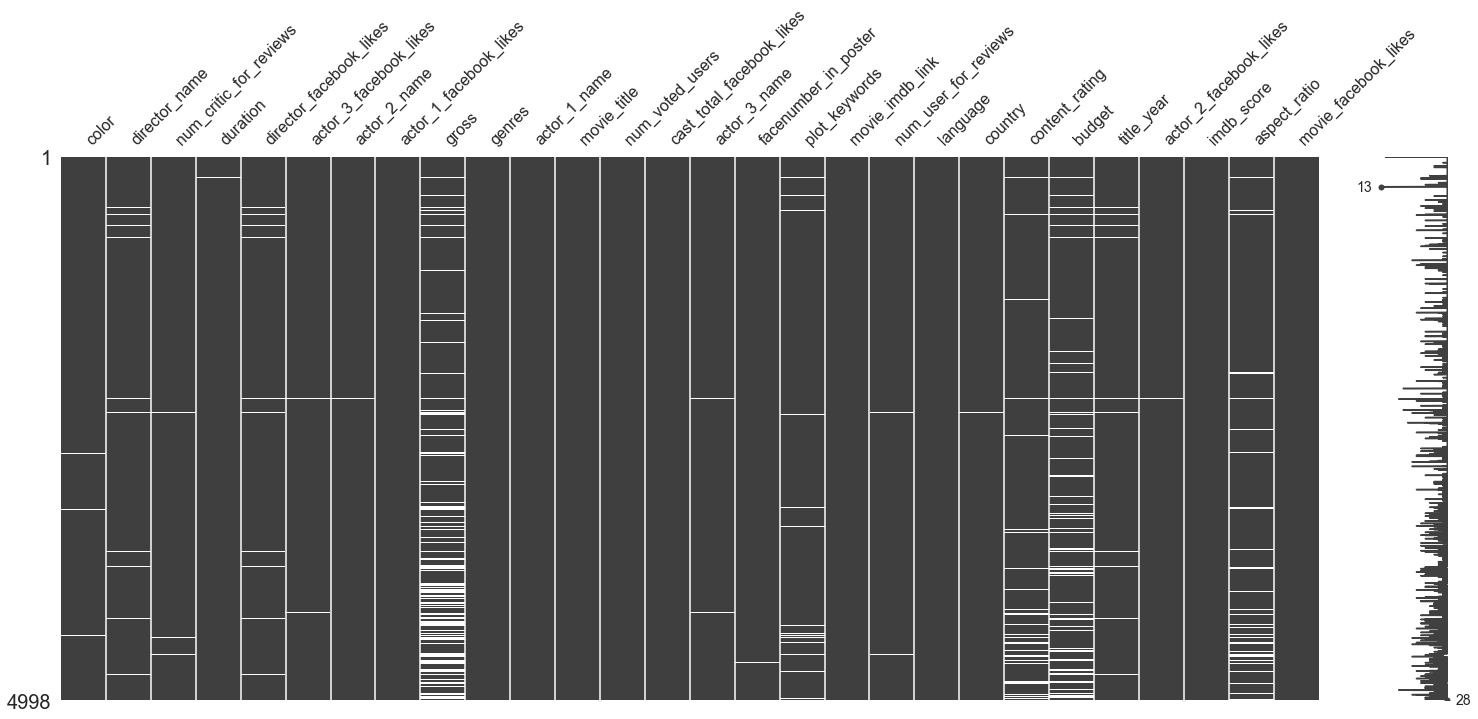

In [1715]:
msno.matrix(data) 
# we are able to see director_name, director facebook likes and title year seem to be missing values at the same places.

#### Dropping NA values

In [1716]:
df = data #storing the data in a new variable df
df = df.dropna(subset=['gross', 'budget','content_rating']) # I am droping NA from 3 columns that have the highest NA value  

In [1717]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 5042
Data columns (total 28 columns):
color                        3804 non-null object
director_name                3806 non-null object
num_critic_for_reviews       3805 non-null float64
duration                     3806 non-null float64
director_facebook_likes      3806 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_2_name                 3804 non-null object
actor_1_facebook_likes       3805 non-null float64
gross                        3806 non-null float64
genres                       3806 non-null object
actor_1_name                 3805 non-null object
movie_title                  3806 non-null object
num_voted_users              3806 non-null int64
cast_total_facebook_likes    3806 non-null int64
actor_3_name                 3800 non-null object
facenumber_in_poster         3800 non-null float64
plot_keywords                3785 non-null object
movie_imdb_link              3806 non-

In [1718]:
df.isnull().sum() # I am looking for columns that have the highest missing values

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        6
actor_2_name                  2
actor_1_facebook_likes        1
gross                         0
genres                        0
actor_1_name                  1
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  6
facenumber_in_poster          6
plot_keywords                21
movie_imdb_link               0
num_user_for_reviews          0
language                      2
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        2
imdb_score                    0
aspect_ratio                 55
movie_facebook_likes          0
dtype: int64

#### Content Ratings 

In [1719]:
df1 = df


In [1720]:
# the data contains content rating naming from the past 100 years which we don't normally use.
df1['content_rating'].value_counts()

R            1723
PG-13        1314
PG            573
G              91
Not Rated      42
Unrated        24
Approved       17
X              10
NC-17           6
Passed          3
M               2
GP              1
Name: content_rating, dtype: int64

In [1721]:
# I rename the content ratings naming
df1 = df1.replace({'content_rating': 'M' }, {'content_rating': 'PG'})
df1 = df1.replace({'content_rating': 'GP' }, {'content_rating': 'PG'})
df1= df1.replace({'content_rating': 'X' }, {'content_rating': 'NC-17'})
df1 = df1.replace({'content_rating': 'Approved' }, {'content_rating': 'R'})
df1 = df1.replace({'content_rating': 'Not Rated' }, {'content_rating': 'R'})
df1 = df1.replace({'content_rating': 'Passed' }, {'content_rating': 'R'})
df1 = df1.replace({'content_rating': 'Unrated' }, {'content_rating': 'R'})

In [1722]:
df1['content_rating'].value_counts() # now content ratings have 5 columns.

R        1809
PG-13    1314
PG        576
G          91
NC-17      16
Name: content_rating, dtype: int64

### Add Columns

#### Profit Column

In [1723]:
df2 = df1 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 5042
Data columns (total 28 columns):
color                        3804 non-null object
director_name                3806 non-null object
num_critic_for_reviews       3805 non-null float64
duration                     3806 non-null float64
director_facebook_likes      3806 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_2_name                 3804 non-null object
actor_1_facebook_likes       3805 non-null float64
gross                        3806 non-null float64
genres                       3806 non-null object
actor_1_name                 3805 non-null object
movie_title                  3806 non-null object
num_voted_users              3806 non-null int64
cast_total_facebook_likes    3806 non-null int64
actor_3_name                 3800 non-null object
facenumber_in_poster         3800 non-null float64
plot_keywords                3785 non-null object
movie_imdb_link              3806 non-

In [1724]:
# We added a Profit column 
df2['profit'] = df2['gross'] - df2['budget'] 
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


#### Return on Investment Column

In [1725]:
df2['return_on_investment'] = ( df2['profit']/df2['budget'] )*100
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775


#### imdbscores bins

In [1726]:
# setting my own values for bins
df2['imdbscores_bins'] = pd.cut(df2['imdb_score'], bins=[0, 2, 4, 6, 8, 10], labels=[1,2,3,4,5])
# see the result
df2.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment,imdbscores_bins
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,4
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,4
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,4
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,5
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,4


### Remove Columns

#### Do we need the Color column?

In [1727]:
df2['color'].value_counts()

Color              3680
Black and White     124
Name: color, dtype: int64

In [1728]:
tot = 3725+130
col = 3725
(col/tot)*100

96.62775616083009

In [1729]:
df2 = df2.drop('color', axis = 1)
df2.head(2)


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment,imdbscores_bins
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,4
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,4


<font color=blue>Close to 97% of the movie is colored. Which implies that the variable is almost constant and not needed so we drop the color column.</font>

#### Do we need the Language Column? `

In [1730]:
df2['language'].value_counts()

English       3644
French          34
Spanish         24
Mandarin        14
German          11
Japanese        10
Cantonese        7
Italian          7
Hindi            5
Korean           5
Portuguese       5
Norwegian        4
Thai             3
Danish           3
Dutch            3
Persian          3
Aboriginal       2
Hebrew           2
Dari             2
Indonesian       2
Russian          1
Hungarian        1
Czech            1
Kazakh           1
Zulu             1
Vietnamese       1
Aramaic          1
Arabic           1
Bosnian          1
Romanian         1
Mongolian        1
Maya             1
Filipino         1
None             1
Name: language, dtype: int64

In [1731]:
len(df2['language'])

3806

In [1732]:
eng = 3674
totl = 3857
eng/totl

0.9525537982888255

In [1733]:
df2 = df2.drop('language', axis = 1)
df2.head(2)

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment,imdbscores_bins
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,4
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,4


<font color=blue>Little over 95% of the movies are in English. This 95% implies that language column is nearly constant so we remove it.</font>

#### Do we Country variable? 

In [1734]:
df2['country'].value_counts()

USA               3025
UK                 316
France             103
Germany             79
Canada              63
Australia           40
Spain               22
Japan               15
China               13
Hong Kong           13
New Zealand         11
Italy               11
Mexico              10
Denmark              9
South Korea          8
Ireland              7
Brazil               5
India                5
Iran                 4
Thailand             4
Norway               4
Russia               3
Czech Republic       3
Netherlands          3
Argentina            3
South Africa         3
Taiwan               2
Hungary              2
Israel               2
Romania              2
New Line             1
Official site        1
Philippines          1
Belgium              1
Colombia             1
Iceland              1
Peru                 1
West Germany         1
Georgia              1
Afghanistan          1
Poland               1
Indonesia            1
Greece               1
Aruba      

In [1735]:
#USA is number 1 followed by UK but the rest of the countries aren't that significant so we group in one as other. 
# create a function
def f(x):
    if x == 'USA': return 'USA'
    elif x == 'UK': return 'UK'
    else: return 'others'
    
#Got it from the online forum: Midterm Project

In [1736]:
# apply the function
df2['country'] = df2['country'].apply(f)
#Got it from the online forum: Midterm Project

In [1737]:
df2['country'].value_counts() 

USA       3025
others     465
UK         316
Name: country, dtype: int64

In [1738]:
usa = 3047
oth = 490
uk = 320
totc = usa + oth + uk
ustp = round((usa/totc)*100, 3)
othtp = round((oth/totc)*100, 3)
uktp = round((uk/totc)*100, 3)
print('Total Share percent for US: %s, UK: %s, Other: %s is the percent of \
                    movies that are made in those countries' %(ustp, uktp, othtp))

Total Share percent for US: 78.999, UK: 8.297, Other: 12.704 is the percent of                     movies that are made in those countries


<font color=blue> Even though USA has close to 80% doesn't mean country variable is constant. Instead of removing the column I will create a categorical variable with less levels. </font>

## Business intelligence: Potentially, you can answer a lot of interesting questions using business intelligence techniques we’ve learned. The focus should be on what variables are good predictors for a movie’s success. You must use a variety of data visualization and business intelligence techniques. This is the most important component of this project. If this section is “too thin”, your project will receive a very low grade.


In [1739]:
df3 = df2

In [1740]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 5042
Data columns (total 29 columns):
director_name                3806 non-null object
num_critic_for_reviews       3805 non-null float64
duration                     3806 non-null float64
director_facebook_likes      3806 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_2_name                 3804 non-null object
actor_1_facebook_likes       3805 non-null float64
gross                        3806 non-null float64
genres                       3806 non-null object
actor_1_name                 3805 non-null object
movie_title                  3806 non-null object
num_voted_users              3806 non-null int64
cast_total_facebook_likes    3806 non-null int64
actor_3_name                 3800 non-null object
facenumber_in_poster         3800 non-null float64
plot_keywords                3785 non-null object
movie_imdb_link              3806 non-null object
num_user_for_reviews         3806 non-

### Find good predictors for Movie's Success.

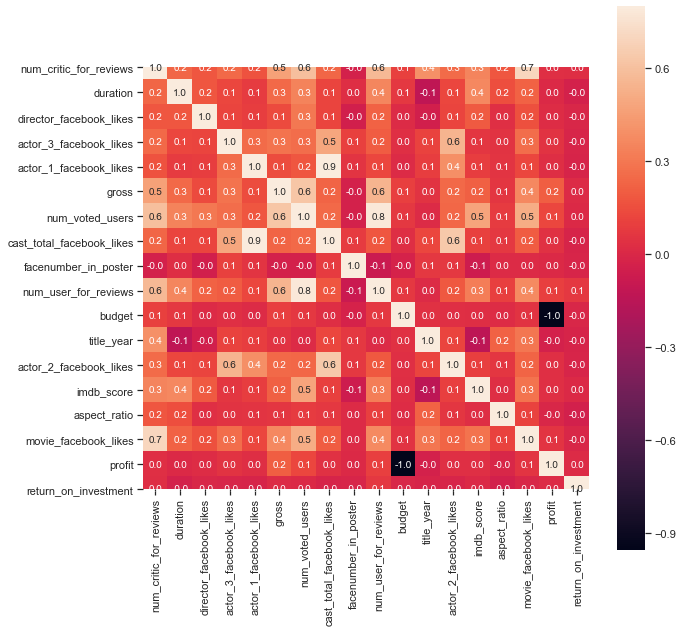

In [1741]:
plt.figure(figsize=(10,10)) # I want to visualize the correlation to find Predictors.
sns.heatmap(df3.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

1. 30% - 50% corraltion the varaible and IMBD Score : 
    - Num critic for review(30%)
    - duration(40%)
    - num voted users(50%) 
    - num users for reviews(30%)
    - movies facebook like(30%) 
2. Budget and Profit have close to 0% correlation with IMBD Score.


### Number of movies realsed each year. 

In [1742]:
px.bar(df3, x='title_year')#Bar graph of all movies that year. 

In [1743]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 5042
Data columns (total 29 columns):
director_name                3806 non-null object
num_critic_for_reviews       3805 non-null float64
duration                     3806 non-null float64
director_facebook_likes      3806 non-null float64
actor_3_facebook_likes       3800 non-null float64
actor_2_name                 3804 non-null object
actor_1_facebook_likes       3805 non-null float64
gross                        3806 non-null float64
genres                       3806 non-null object
actor_1_name                 3805 non-null object
movie_title                  3806 non-null object
num_voted_users              3806 non-null int64
cast_total_facebook_likes    3806 non-null int64
actor_3_name                 3800 non-null object
facenumber_in_poster         3800 non-null float64
plot_keywords                3785 non-null object
movie_imdb_link              3806 non-null object
num_user_for_reviews         3806 non-

In [1744]:
# First filter out those rows which 
# does not contain any data 
df3 = df3.dropna(how = 'all') 

#https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

In [1745]:
df3.drop(df3[df3['title_year'] <= 1980].index, inplace = True)

In [1746]:
px.bar(df3, x='title_year')

In [1747]:
df3.isnull().sum()

director_name                 0
num_critic_for_reviews        1
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        4
actor_2_name                  2
actor_1_facebook_likes        1
gross                         0
genres                        0
actor_1_name                  1
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  4
facenumber_in_poster          6
plot_keywords                21
movie_imdb_link               0
num_user_for_reviews          0
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        2
imdb_score                    0
aspect_ratio                 54
movie_facebook_likes          0
profit                        0
return_on_investment          0
imdbscores_bins               0
dtype: int64

In [1748]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3697 entries, 0 to 5042
Data columns (total 29 columns):
director_name                3697 non-null object
num_critic_for_reviews       3696 non-null float64
duration                     3697 non-null float64
director_facebook_likes      3697 non-null float64
actor_3_facebook_likes       3693 non-null float64
actor_2_name                 3695 non-null object
actor_1_facebook_likes       3696 non-null float64
gross                        3697 non-null float64
genres                       3697 non-null object
actor_1_name                 3696 non-null object
movie_title                  3697 non-null object
num_voted_users              3697 non-null int64
cast_total_facebook_likes    3697 non-null int64
actor_3_name                 3693 non-null object
facenumber_in_poster         3691 non-null float64
plot_keywords                3676 non-null object
movie_imdb_link              3697 non-null object
num_user_for_reviews         3697 non-

<font color=blue>I want to remove the skewness in the graph. I do that by removing movies released records before 1980 because that data may not be representative can even be considered outliers. Outliers mess up the results so it's better to remove those outliers to see the valid results of the analysis. </font>

### Does Duration affect IMBD score?

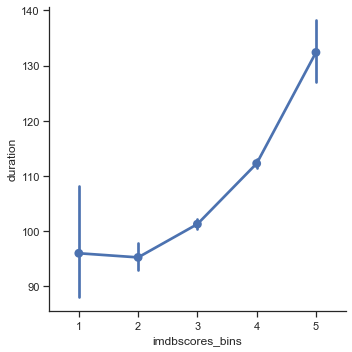

In [1749]:
sns.catplot("imdbscores_bins", "duration", data=df3, kind='point')

In [1750]:
fig = px.box(df3, x="imdbscores_bins", y="duration", points="all")
fig.show()

In [1751]:
#px.scatter(df3, x="imdbscores_bins", y="duration", trendline='ols')
fig1 = px.scatter(df3, x="imdb_score", y="duration", trendline='ols')
fig1.show()

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<font color=blue>Yes duration does affect IMDB score. From the graphs we can understand as Duration increases the IMDB score seem to gradually increase as well. </font>

### Correlation between IMDB score and number of Facebook likes.

In [1752]:
px.scatter(df3, x="movie_facebook_likes", y="imdb_score", color="content_rating")
#http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html

<font color=blue>From the graph we can see some correlation. We can see as the number of likes increase the IMDB score also increases. But the exception is the low facebook like seem to vary greatly in the IMDB Score. Ex. One of the movies don't have any facebook likes but still has a IMDB score of 8.6. </font>

### What is the relationship between Num voted users and IMDB score?

In [1753]:
px.scatter(df3, x="imdb_score", y="num_voted_users", marginal_y="histogram", marginal_x="histogram")

<font color=blue>We can see a relationship between IMDB score and num voted users. As we go down the graph the num voted users data points fans out and increase. </font>

### What is the relationship between Budget and IMDB score?

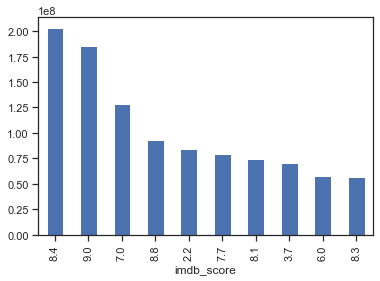

In [1754]:
df3.groupby('imdb_score')['budget'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

<font color=blue>Budget and IMDB score don't seem to have any correlation. From the graph we can see the one at the end has a 8.3 IMBD score even though it less than the 7.0. </font>

### What is the relationship between Movie user reviews and IMDB score?

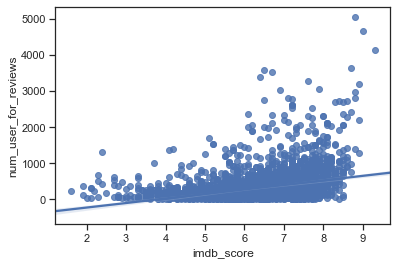

In [1755]:
sns.regplot(df3.imdb_score, df3.num_user_for_reviews)

<font color=blue>We can see a relationship between MOvie user reviews and IMDB score since the data points are closer to the linear regression line.</font>

## Correlation analysis: This extends the previous section (business intelligence). 

In [1756]:
df4 = df3

In [1757]:
df4 = df4.dropna() # I dropped all the null values to see if that impacts the correlation analysis.

In [1758]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 0 to 5042
Data columns (total 29 columns):
director_name                3619 non-null object
num_critic_for_reviews       3619 non-null float64
duration                     3619 non-null float64
director_facebook_likes      3619 non-null float64
actor_3_facebook_likes       3619 non-null float64
actor_2_name                 3619 non-null object
actor_1_facebook_likes       3619 non-null float64
gross                        3619 non-null float64
genres                       3619 non-null object
actor_1_name                 3619 non-null object
movie_title                  3619 non-null object
num_voted_users              3619 non-null int64
cast_total_facebook_likes    3619 non-null int64
actor_3_name                 3619 non-null object
facenumber_in_poster         3619 non-null float64
plot_keywords                3619 non-null object
movie_imdb_link              3619 non-null object
num_user_for_reviews         3619 non-

### Perform correlation analysis and discuss the results. Again, what variables are correlated to imdb_score? How are some key variables correlated to each other?

In [1759]:
df4.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment
num_critic_for_reviews,1.000000,0.257670,0.176678,0.244537,0.164313,0.464291,0.599836,0.232401,-0.033298,0.560951,0.103355,0.510562,0.250044,0.360691,0.179978,0.704519,0.036861,0.031092
duration,0.257670,1.000000,0.200646,0.131091,0.095192,0.258697,0.354772,0.132311,0.018087,0.373161,0.076076,-0.045928,0.136640,0.365767,0.159362,0.232439,0.002334,-0.034638
director_facebook_likes,0.176678,0.200646,1.000000,0.123559,0.089083,0.142465,0.311520,0.120476,-0.046711,0.221997,0.018885,-0.058199,0.121642,0.194544,0.040243,0.166378,0.023943,-0.006327
actor_3_facebook_likes,0.244537,0.131091,0.123559,1.000000,0.250607,0.284727,0.260883,0.484057,0.108027,0.200724,0.037203,0.120158,0.548535,0.069720,0.045204,0.258513,0.048384,-0.011850
actor_1_facebook_likes,0.164313,0.095192,0.089083,0.250607,1.000000,0.145007,0.180191,0.945961,0.058319,0.122261,0.014670,0.081861,0.388813,0.101137,0.053914,0.127375,0.028853,-0.014852
gross,0.464291,0.258697,0.142465,0.284727,0.145007,1.000000,0.626883,0.231536,-0.031855,0.548045,0.099989,0.069777,0.247544,0.213885,0.063717,0.359744,0.200136,0.016642
num_voted_users,0.599836,0.354772,0.311520,0.260883,0.180191,0.626883,1.000000,0.246771,-0.033549,0.780191,0.068493,0.055436,0.239690,0.479103,0.093226,0.518995,0.119739,0.008484
cast_total_facebook_likes,0.232401,0.132311,0.120476,0.484057,0.945961,0.231536,0.246771,1.000000,0.081518,0.177117,0.026093,0.114172,0.639201,0.114983,0.065824,0.198271,0.043441,-0.017820
facenumber_in_poster,-0.033298,0.018087,-0.046711,0.108027,0.058319,-0.031855,-0.033549,0.081518,1.000000,-0.081777,-0.022410,0.105759,0.072916,-0.070366,0.020251,0.014454,0.012555,-0.011885
num_user_for_reviews,0.560951,0.373161,0.221997,0.200724,0.122261,0.548045,0.780191,0.177117,-0.081777,1.000000,0.071734,0.032923,0.184247,0.320771,0.100328,0.366259,0.093007,0.065533


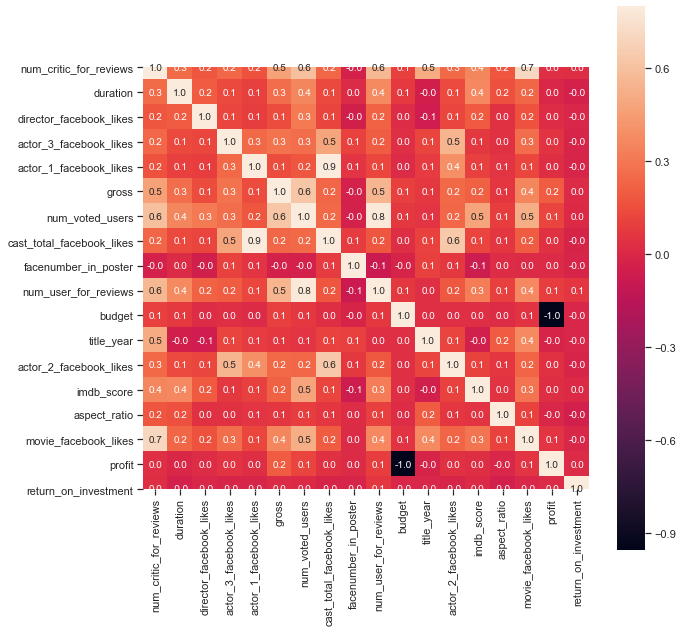

In [1760]:
plt.figure(figsize=(10,10)) # I want to visualize the correlation to find Predictors.
sns.heatmap(df4.corr(), vmax=.8, square=True, annot=True, fmt=".1f");

Result Discussion: 
    From the results I was able to conclude that IMDB score is more affected by people critics and reviews. That makes perfect sense since people are the ones that ultimately decided if the movie will succeed or fail. Even a low budget movie like a paranormal activity was huge hit while big block buster movies that spend millions fail in the office box. If we look at the variables that are highly correlated they are variables like Num critic for review, facebook_likes, num voted users, and num users for reviews. These high correlation variables implie the people intraction with the movie is what decides the IMDB scores success or failure. Gross and IMDB correlation makes sense since if the IMDB score is high that means it is likely people are going to the theater to watch the movie in turn increases the Gross.  
    Things that I found intresting is the fact that duration had a 40% correlation with IMDB meaning the longer the movie the higher the IMDB score it might get. I can't quite understand this because I thought people would be bored and lose interest if the movie was to long. I was kinda shocked to find Profit and Return on investment didn't have a correlation with IMDB because if IMDB is high I thought profit would increase but apparently that was not the case. The reason for no correlation might be because of the budget variable interaction with the profit varaible. Huge budget movies are not always likely to do well in the theaters. 
    There was two varaible that had negative correlation that was the face number in the poster and title year. Face number in the poster is negative because about 95% of the posters had less than 5 impling that the varaible is nearly constant so it's not helpful in predicting the IMDB score. Title year has a negative correlation because as the years pass the technology is advancing and the number of movies that are coming out are increasing. The vast majority of the movies don't do that well which might be the reason for the negative correlation
    


**These variables had postive correlation:**
1. **Num critic for review** was the only variable that increased from 30% to 40% correlation between IMDB after I dropped all the null values. 
2. **duration** had a 40% correlation with IMDB
3. **director_facebook_likes** had a 20% correlation with IMDB. 
4. **actor_3_facebook_likes** had 10% correlation with IMDB. 
5. **actor_1_facebook_likes** had 10% correlation with IMDB. 
6. **Gross** had 20% correlation with IMDB. 
7. **num voted users** had a 50% correlation with IMDB. 
8. **cast_total_facebook_likes** had 10% correlation with IMDB.
9. **num users for reviews**had 30% correlation with IMDB.
10. **actor_2_facebook_likes** had 10% correlation with IMDB.
11. **Aspect ratio** had 10% correlation with IMDB.
12. **movies facebook like** had 30% correlation with IMDB.

**Variable that had close to 0% correlation with IMBD Score.**
- **Budget, Profit, and Return on investment**

**Variable that had negative correlation:**
- **facenumber_in_poster, and ,title_year**



## Storytelling: At the end, this is what your client is interested in. Develop useful insights from your analysis. Write a summery using bulleted lists and/or numbers in markdown cells. If this section is “too thin”, your project will receive a low grade.

    The intital goal of this analysis was to use the data to understand what factors that impact the response varaible IMDB Score. During the analysis we were able to understand the relationship between those varaibles. We are now more confident in predicting the IMDB score using the varibales to determine the success or a failure of the movie before it's released. We were given 28 variables to work with from 5043 movies and 4906 posters, spanning across 100 years in 66 countries. After cleaning and visualizing the data we ended up with 12 varaibles with postive correlations that were helpful in understanding how the IMDB Score was impacted. 

    From studying the 12 postive correlated variables we were able to understand IMDB score was greatly impacted by the customers reviews and intraction with the movie before the release. More than 85% of the postively correlated variables were dealing with customer feedback data like 'Num critic for review' 40% correlation, 'num voted users' 50% correlation, 'num users for reviews' 30% correlation, and 'facebook_likes from the people to actors'. 
    
    Why is knowing more than 85% of the 12 varaibles deal with people feedback important? It is important to know becuse people feedback has a very strong correlation that greatly impacts the IMDB score. So movie production companies have to do their best in postively engaging with the people to create a hype about the new movie release. For example Apple understands this concept and capitalize on it by creating that hype which makes customer to stand in line for days to buy the new phone. If Movie companies and actors intract with their customers through social media keeping them engaged with the content they are highly likey to get a good IMDB score. 
    
    Another area to focus on if the company wants to increase it's IMDB score is to increase the duration of the Movie. Since duration is the second biggest correlation of 40% to IMDB score. By increasing the duration it will gradually increase the IMDB score. Company can cut cost and time by reducing the number of new poster they post before the release of the movie. Facenumber in poster has a negative correlation with IMDB score so it better to have less posters. 
    
   





# 2. Final Project

In [1761]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

#f_regression (feature selection)
from sklearn.feature_selection import f_regression

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Classifiers
#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# grid search
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import scikitplot as skplt
import graphviz

## Data Cleaning and Transforming

In [1762]:
# I plan to use the same dataset I have used in my midterm
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 0 to 5042
Data columns (total 29 columns):
director_name                3619 non-null object
num_critic_for_reviews       3619 non-null float64
duration                     3619 non-null float64
director_facebook_likes      3619 non-null float64
actor_3_facebook_likes       3619 non-null float64
actor_2_name                 3619 non-null object
actor_1_facebook_likes       3619 non-null float64
gross                        3619 non-null float64
genres                       3619 non-null object
actor_1_name                 3619 non-null object
movie_title                  3619 non-null object
num_voted_users              3619 non-null int64
cast_total_facebook_likes    3619 non-null int64
actor_3_name                 3619 non-null object
facenumber_in_poster         3619 non-null float64
plot_keywords                3619 non-null object
movie_imdb_link              3619 non-null object
num_user_for_reviews         3619 non-

### Changing variable Data type

In [1763]:
# Understanding the groups within the variable
df4['content_rating'].value_counts() 

R        1706
PG-13    1290
PG        534
G          76
NC-17      13
Name: content_rating, dtype: int64

In [1764]:
# Turn content rating to numeric
df4 = df4.replace({'content_rating': 'R' }, {'content_rating': 1})
df4 = df4.replace({'content_rating': 'PG-13' }, {'content_rating': 2})
df4 = df4.replace({'content_rating': 'PG' }, {'content_rating': 3})
df4 = df4.replace({'content_rating': 'G' }, {'content_rating': 4})
df4 = df4.replace({'content_rating': 'NC-17' }, {'content_rating': 5})
df4['content_rating'].astype(int).head()

0    2
1    2
2    2
3    2
5    2
Name: content_rating, dtype: int32

### Removing variables

In [1765]:
# I dropped all the non-numeric variables
df4 = df4.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'country', 'imdbscores_bins', 'content_rating'], axis=1)
df4.info() # I dropped all the non-numeric variables


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3619 non-null float64
duration                     3619 non-null float64
director_facebook_likes      3619 non-null float64
actor_3_facebook_likes       3619 non-null float64
actor_1_facebook_likes       3619 non-null float64
gross                        3619 non-null float64
num_voted_users              3619 non-null int64
cast_total_facebook_likes    3619 non-null int64
facenumber_in_poster         3619 non-null float64
num_user_for_reviews         3619 non-null float64
budget                       3619 non-null float64
title_year                   3619 non-null float64
actor_2_facebook_likes       3619 non-null float64
imdb_score                   3619 non-null float64
aspect_ratio                 3619 non-null float64
movie_facebook_likes         3619 non-null int64
profit                       3619 non-null float64
return_on_investment         361

### Exploratory data analysis

In [1766]:
# This focus on only one variable corralation
corr = pd.DataFrame(df4.corr()['imdb_score'].drop('imdb_score')) # correlation of Imdb_ score
corr.sort_values(['imdb_score'], ascending = False)

,imdb_score
num_voted_users,0.479103
duration,0.365767
num_critic_for_reviews,0.360691
num_user_for_reviews,0.320771
movie_facebook_likes,0.291631
gross,0.213885
director_facebook_likes,0.194544
cast_total_facebook_likes,0.114983
actor_2_facebook_likes,0.107721
actor_1_facebook_likes,0.101137


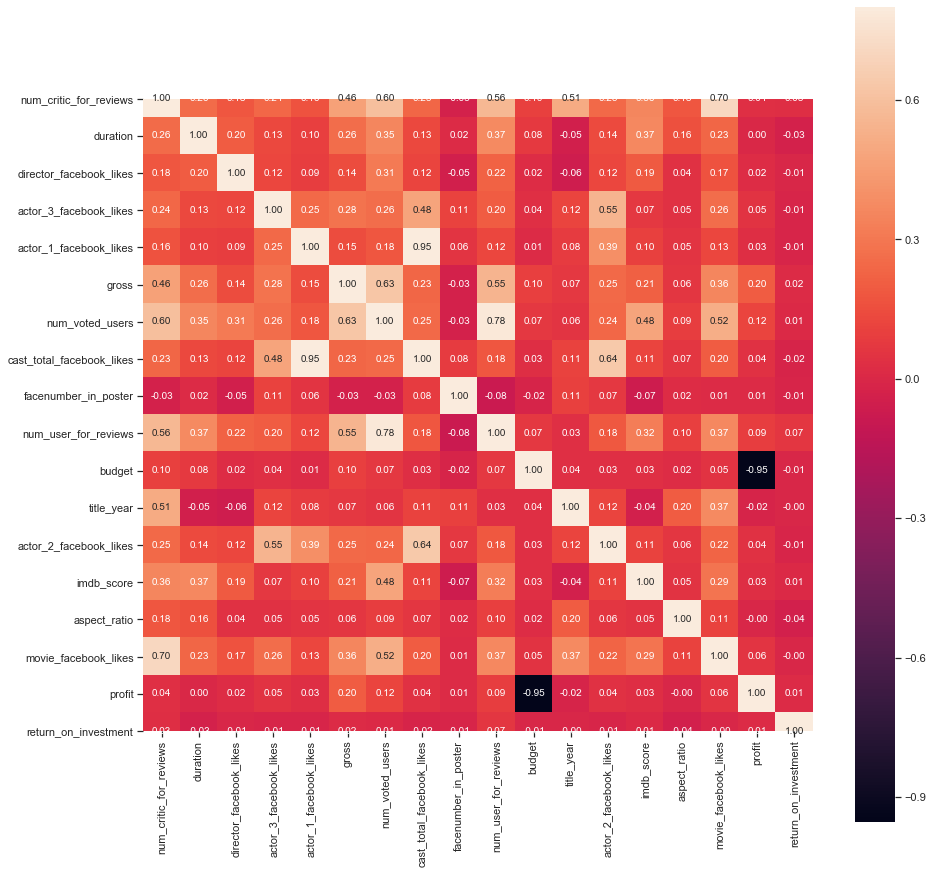

In [1767]:
plt.figure(figsize=(15,15)) # I want to visualize the correlation to find Predictors.
sns.heatmap(df4.corr(), vmax=.8, square=True, annot=True, fmt=".2f");

## Regression


### Build regression models using different regression algorithms. The Y value is imdb_score. It is important you use important features in your models.

I will start of with Feature Selection because it refers to the process of selecting the most useful predictors, helping analysts understand what predictors matter in predicting y value the goal is developing the simple regression model with the user specificed number of predictors.

We will start of with a feature selection for analysis. We will consider df4 as the original dataset and use it in the beginning. Then we will select the top 7 based on each analysis Feature Selection and one dependent variable

#### RandormForestRegressor for Feature Selection

In [1768]:
# build a model using all the variables
y = df4['imdb_score']
X = df4.drop('imdb_score', axis =1)

In [1769]:
regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print("mean square error: ", mean_squared_error(y, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y, regr_predicted))

mean square error:  0.06882934429400393
variance or r-squared:  0.9369277747254211


Accuracy of RandormForestRegressor model is 93.7% and MSE of just .069. This model is using 17 independent varaible to predict the y value.

In [1770]:
#Rank the predictors by order of importance.
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
num_voted_users,0.320567
duration,0.113785
budget,0.099983
num_user_for_reviews,0.068534
gross,0.060420
num_critic_for_reviews,0.047366
title_year,0.036396
director_facebook_likes,0.035106
actor_3_facebook_likes,0.034450
cast_total_facebook_likes,0.029928


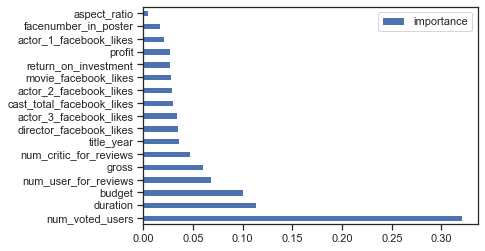

In [1771]:
#Visualize Feature Importance
feature_importances.plot(kind='barh')

Top 3 variables by RandormForestRegressor:
    1. num_voted_users
    2. duration
    3. budget

RandormForestRegressor for Feature Selection helped us see the important predictors. By identifying the important variables we can now build a better model using less varaibles. 


In [1772]:
# Storing the top 7 predictors and one dependent variable 
df5 = df4[['num_voted_users','duration', 'budget', 'num_user_for_reviews', 'gross','num_critic_for_reviews', 'title_year','imdb_score']]

#### Multiple regression line using scikit-learn

In [1773]:
# build a model using the top 7 predictors as X
y = df5['imdb_score']
X = df5.drop('imdb_score', axis =1)

In [1774]:
# Fit the model below

model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [1775]:
# The coefficients
print('Coefficients: ', model1.coef_)
# y-intercept
print("y-intercept ", model1.intercept_)

Coefficients:  [ 3.63836639e-06  1.11320508e-02 -3.69456367e-11 -6.17539030e-04
 -2.46148097e-09  2.54831715e-03 -2.69115632e-02]
y-intercept  58.676953721120235


In [1776]:
pd.DataFrame(list(zip(X.columns, np.transpose(model1.coef_)))) #create a dataframe combining comlun names and respective coefficients

,0,1
0,num_voted_users,3.638366e-06
1,duration,1.113205e-02
2,budget,-3.694564e-11
3,num_user_for_reviews,-6.175390e-04
4,gross,-2.461481e-09
5,num_critic_for_reviews,2.548317e-03
6,title_year,-2.691156e-02


In [1777]:
coef = ["%.3f" % i for i in model1.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_voted_users', '0.000'),
 ('duration', '0.011'),
 ('budget', '-0.000'),
 ('num_user_for_reviews', '-0.001'),
 ('gross', '-0.000'),
 ('num_critic_for_reviews', '0.003'),
 ('title_year', '-0.027')]

In [1778]:
print("mean square error: ", mean_squared_error(y, model1_y))
print("variance or r-squared: ", explained_variance_score(y, model1_y))

mean square error:  0.7234072279197189
variance or r-squared:  0.336847181085142


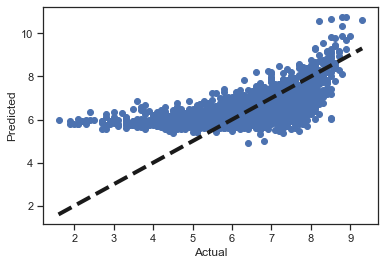

In [1779]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Accuracy of Multiple regression model is just 34% and MSE of just .72

#### Lasso Model 

In [1780]:
#Regression model based on regularization
# Fit the model below
model2 =  lm.Lasso()            #higher alpha (penality parameter), fewer predictors
model2.fit(X, y)
model2_y = model2.predict(X)

In [1781]:
# The coefficients
print('Coefficients: ', model2.coef_)
# y-intercept
print("y-intercept ", model2.intercept_)

Coefficients:  [ 3.98718916e-06  9.42159715e-03 -1.90861403e-11 -4.71993295e-04
 -2.32836751e-09  1.15974417e-03 -0.00000000e+00]
y-intercept  5.073953486391769


In [1782]:
coef = ["%.3f" % i for i in model2.coef_]
xcolumns = [ i for i in X.columns ]
list(zip(xcolumns, coef))

[('num_voted_users', '0.000'),
 ('duration', '0.009'),
 ('budget', '-0.000'),
 ('num_user_for_reviews', '-0.000'),
 ('gross', '-0.000'),
 ('num_critic_for_reviews', '0.001'),
 ('title_year', '-0.000')]

In [1783]:
pd.DataFrame(list(zip(X.columns, np.transpose(model2.coef_))))

,0,1
0,num_voted_users,3.987189e-06
1,duration,9.421597e-03
2,budget,-1.908614e-11
3,num_user_for_reviews,-4.719933e-04
4,gross,-2.328368e-09
5,num_critic_for_reviews,1.159744e-03
6,title_year,-0.000000e+00


In [1784]:
print("mean square error: ", mean_squared_error(y, model2_y))
print("variance or r-squared: ", explained_variance_score(y, model2_y))

mean square error:  0.7517544890565728
variance or r-squared:  0.31086103468530757


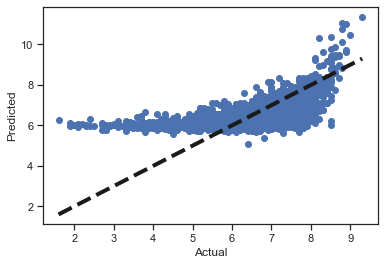

In [1785]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model2_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Accuracy of Lasso model is just 31% and MSE of just .75

#### Ridge

In [1786]:
model3 =  lm.Ridge()            #higher alpha (penality parameter), fewer predictors
model3.fit(X, y)
model3_y = model3.predict(X)

In [1787]:
print("mean square error: ", mean_squared_error(y, model3_y))
print("variance or r-squared: ", explained_variance_score(y, model3_y))

mean square error:  0.7234072279212801
variance or r-squared:  0.33684718108371103


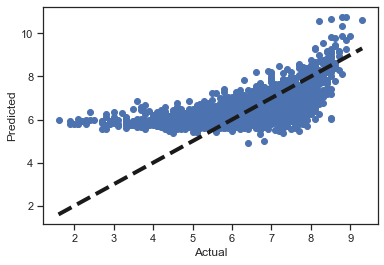

In [1788]:
# try to evaluate the performance of our model's prediction using visualization

plt.subplots()
plt.scatter(y, model3_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Accuracy of Ridge model is just 33% and MSE of just .072

#### RandomForest

In [1789]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X, y)  
ranf_pre = regr.predict(X)
#max_depth=2

In [1790]:
print("mean square error: ", mean_squared_error(y, ranf_pre))
print("variance or r-squared: ", explained_variance_score(y, ranf_pre))

mean square error:  0.06958742995302576
variance or r-squared:  0.9362217177651815


In [1791]:
# list the important variables
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

feature_importances

,importance
num_voted_users,0.358612
duration,0.140426
budget,0.139001
gross,0.116381
num_user_for_reviews,0.099745
num_critic_for_reviews,0.080082
title_year,0.065753


 Accuracy of RandomForest regression model is 93% and MSE of just .069

## Classification

### ExtraTreesClassifier for Feature Selection

In [1792]:
# Storing the Orginal dataset into a new variable 
df6 = df4

The goal is to build a classification model to predict if a movie is good or bad. You need to create a new “categorical” column from imdb_score in order to build classification models. Create the column by “binning” the imdb_score into 4 categories (or buckets): “less than 4, 4~6, 6~8 and 8~10, which represents bad, OK, good and excellent respectively”



In [1793]:
#create a new variable called catefory
df6['category'] = pd.cut(df6['imdb_score'], bins=[1,4,6,8,10], labels=['1', '2', '3', '4'])

df6.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment,category
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,3
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,3
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,3
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,4
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,3


In [1794]:
# declare X variables and y variable
y =  df6['category']
X = df6.drop(['category', 'imdb_score'], axis = 1)

print(y.shape, X.shape)

(3619,) (3619, 17)


In [1795]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
print(model_extra.score(X, y))

# display the relative importance of each attribute
print((model_extra.feature_importances_))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



1.0
[0.06937093 0.07962161 0.05810022 0.05128502 0.04784443 0.06760917
 0.11802343 0.04510006 0.04315776 0.06042138 0.06174591 0.05829959
 0.05156147 0.0307574  0.05581576 0.05368658 0.04759929]


In [1796]:
# Rank all the important variables in order
print("Features sorted by their rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))

Features sorted by their rank:
[(0.0308, 'aspect_ratio'), (0.0432, 'facenumber_in_poster'), (0.0451, 'cast_total_facebook_likes'), (0.0476, 'return_on_investment'), (0.0478, 'actor_1_facebook_likes'), (0.0513, 'actor_3_facebook_likes'), (0.0516, 'actor_2_facebook_likes'), (0.0537, 'profit'), (0.0558, 'movie_facebook_likes'), (0.0581, 'director_facebook_likes'), (0.0583, 'title_year'), (0.0604, 'num_user_for_reviews'), (0.0617, 'budget'), (0.0676, 'gross'), (0.0694, 'num_critic_for_reviews'), (0.0796, 'duration'), (0.118, 'num_voted_users')]


In [1797]:
#List the important variables in order
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

,importance
num_voted_users,0.118023
duration,0.079622
num_critic_for_reviews,0.069371
gross,0.067609
budget,0.061746
num_user_for_reviews,0.060421
title_year,0.058300
director_facebook_likes,0.058100
movie_facebook_likes,0.055816
profit,0.053687


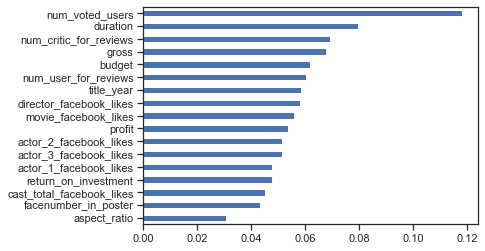

In [1798]:
#Visualize important independent variables 
pd.DataFrame(model_extra.feature_importances_, index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=True).plot(kind='barh', 
                                                                                                            legend=None);

Top 3 predictors using ExtraTreesClassifier:
    1. num_voted_users
    2. duration
    3. budget

In [1799]:
# Storing the top 7 predictors and one dependent variable 
df7 = df6[['num_voted_users','num_critic_for_reviews','duration', 'budget', 'num_user_for_reviews', 'gross', 'title_year','category']]
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 0 to 5042
Data columns (total 8 columns):
num_voted_users           3619 non-null int64
num_critic_for_reviews    3619 non-null float64
duration                  3619 non-null float64
budget                    3619 non-null float64
num_user_for_reviews      3619 non-null float64
gross                     3619 non-null float64
title_year                3619 non-null float64
category                  3619 non-null category
dtypes: category(1), float64(6), int64(1)
memory usage: 229.9 KB


### Decision Tree

In [1800]:
# declare X variables and y variable
y =  df7['category']
X = df7.drop('category', axis = 1)

print(y.shape, X.shape)

(3619,) (3619, 7)


In [1801]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5) # I made the decision tree simpler by having max_depth = 3

# Train a decision tree model
dt = dt.fit(X_train, y_train)

dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [1802]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
#print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.7007366482504604
--------------------------------------------------------
[[  0  11   5   0]
 [  0 134 164   0]
 [  0 123 611   6]
 [  0   0  16  16]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.50      0.45      0.47       298
           3       0.77      0.83      0.80       740
           4       0.73      0.50      0.59        32

    accuracy                           0.70      1086
   macro avg       0.50      0.44      0.47      1086
weighted avg       0.68      0.70      0.69      1086

--------------------------------------------------------


C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



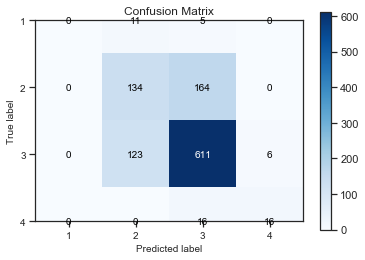

In [1803]:
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

Decision Tree accuracy was 70% for this model.
Confusion Matrix:
1. out of 0 bad movies 0 correctly classified as bad and the rest was Misclassified 
2. out of 268 ok movies 134 correctly classified as ok and the rest was Misclassified 
3. out of 796 good movies 611 correctly classified as good and the rest was Misclassified 
4. out of 22 excellent movies 16 correctly classified as excellent and the rest was Misclassified 

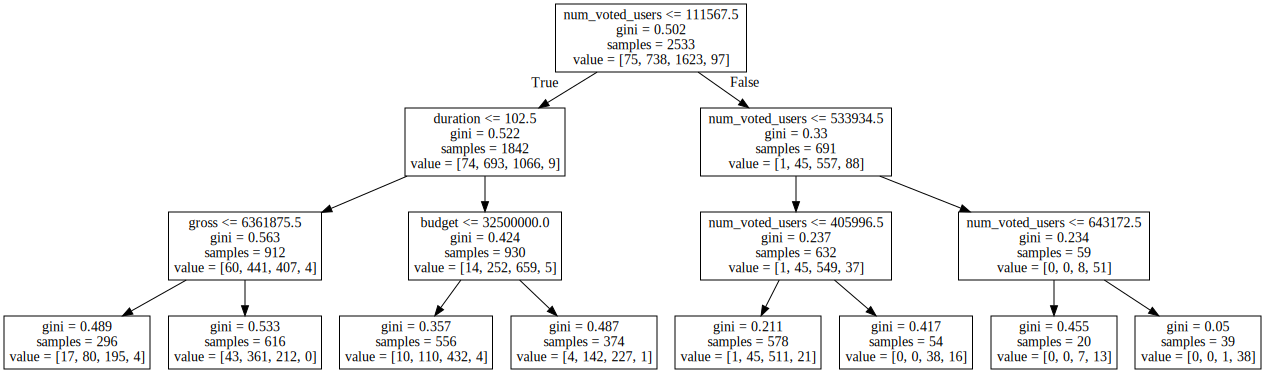

In [1804]:
from graphviz import Source
from sklearn import tree
Source( tree.export_graphviz(dt, out_file=None, feature_names=X.columns))

If num_voted_users <= 111567.5 is false then num_voted_users <= 533934.5 if this false then num_voted_users <= 643172.5 if this false then you have Excllent movie. 

### 10-fold cross-validation

In [1805]:
# evaluate the decision tree model using 10-fold cross-validation

# initialize decision tree algorithm (without fitting)

scores = cross_val_score(DecisionTreeClassifier(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.62362637 0.61707989 0.68870523 0.66298343 0.74585635 0.64917127
 0.65096953 0.65096953 0.57894737 0.65555556]
0.6523864529465426


In [1806]:
# https://scikit-learn.org/stable/modules/cross_validation.html
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.08)


While evaluating the decision tree model using 10-fold cross-validation we get a accuracy rate of 65%

### KNN

In [1807]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn)

# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize DecisionTreeClassifier() ... name your decision model "dt"
knn = KNeighborsClassifier()

# Train a decision tree model
knn = knn.fit(X_train, y_train) # you are pluging the data here

knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1808]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, knn.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, knn.predict(X_test)))
print("--------------------------------------------------------")


0.6261510128913443
--------------------------------------------------------
[[  1   5  10   0]
 [  1  95 202   0]
 [  6 146 584   4]
 [  0   2  30   0]]
--------------------------------------------------------
              precision    recall  f1-score   support

           1       0.12      0.06      0.08        16
           2       0.38      0.32      0.35       298
           3       0.71      0.79      0.75       740
           4       0.00      0.00      0.00        32

    accuracy                           0.63      1086
   macro avg       0.30      0.29      0.29      1086
weighted avg       0.59      0.63      0.60      1086

--------------------------------------------------------


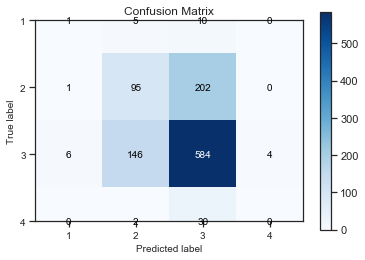

In [1809]:
#Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=knn.predict(X_test))
plt.show()

KNN accuracy was 62% for this model.

Confusion Matrix:
1. out of 8 bad movies 1 correctly classified as bad and the rest was Misclassified 
2. out of 248 ok movies 95 correctly classified as ok and the rest was Misclassified 
3. out of 826 good movies 584 correctly classified as good and the rest was Misclassified 
4. out of 4 excellent movies 0 correctly classified as excellent and the rest was Misclassified 

### Random Forest Classifier

In [1810]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7578268876611418

In [1811]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))

0.7578268876611418
[[  1  10   5   0]
 [  3 173 122   0]
 [  1 103 633   3]
 [  0   0  16  16]]
              precision    recall  f1-score   support

           1       0.20      0.06      0.10        16
           2       0.60      0.58      0.59       298
           3       0.82      0.86      0.84       740
           4       0.84      0.50      0.63        32

    accuracy                           0.76      1086
   macro avg       0.62      0.50      0.54      1086
weighted avg       0.75      0.76      0.75      1086



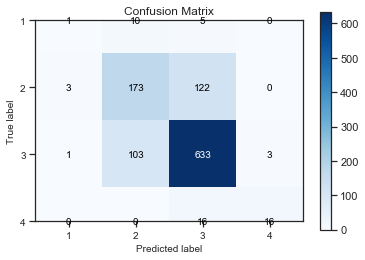

In [1812]:
#Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_true=np.array(y_test), y_pred=clf.predict(X_test))
plt.show()

Random Forest Classifier accuracy was 75% for this model.
Confusion Matrix:
1. out of 5 bad movies 1 correctly classified as bad and the rest was Misclassified 
2. out of 286 ok movies 173 correctly classified as ok and the rest was Misclassified 
3. out of 776 good movies 633 correctly classified as good and the rest was Misclassified 
4. out of 19 excellent movies 16 correctly classified as excellent and the rest was Misclassified 

## Clustering

In [1813]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 0 to 5042
Data columns (total 19 columns):
num_critic_for_reviews       3619 non-null float64
duration                     3619 non-null float64
director_facebook_likes      3619 non-null float64
actor_3_facebook_likes       3619 non-null float64
actor_1_facebook_likes       3619 non-null float64
gross                        3619 non-null float64
num_voted_users              3619 non-null int64
cast_total_facebook_likes    3619 non-null int64
facenumber_in_poster         3619 non-null float64
num_user_for_reviews         3619 non-null float64
budget                       3619 non-null float64
title_year                   3619 non-null float64
actor_2_facebook_likes       3619 non-null float64
imdb_score                   3619 non-null float64
aspect_ratio                 3619 non-null float64
movie_facebook_likes         3619 non-null int64
profit                       3619 non-null float64
return_on_investment         361

In [1814]:
#since category is not numeric we have to drop it.
df8 = df4.drop('category', axis = 1)
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 0 to 5042
Data columns (total 18 columns):
num_critic_for_reviews       3619 non-null float64
duration                     3619 non-null float64
director_facebook_likes      3619 non-null float64
actor_3_facebook_likes       3619 non-null float64
actor_1_facebook_likes       3619 non-null float64
gross                        3619 non-null float64
num_voted_users              3619 non-null int64
cast_total_facebook_likes    3619 non-null int64
facenumber_in_poster         3619 non-null float64
num_user_for_reviews         3619 non-null float64
budget                       3619 non-null float64
title_year                   3619 non-null float64
actor_2_facebook_likes       3619 non-null float64
imdb_score                   3619 non-null float64
aspect_ratio                 3619 non-null float64
movie_facebook_likes         3619 non-null int64
profit                       3619 non-null float64
return_on_investment         361

In [1815]:
#http://stackoverflow.com/questions/12525722/normalize-data-in-pandas
#Normalize data
df_norm = (df8 - df8.mean()) / (df8.max() - df8.min())
df_norm.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment
0,0.684138,0.233406,-0.034870,0.003405,-0.010736,0.931193,0.462667,-0.010428,-0.031950,0.537872,0.015530,0.142549,-0.008105,0.189932,-0.022592,0.067553,0.040706,-0.000373
1,0.165025,0.202689,-0.010392,0.009709,0.050201,0.338033,0.217066,0.055834,-0.031950,0.178694,0.020688,0.085406,0.021560,0.086036,0.015869,-0.027003,0.000343,-0.000676
2,0.534939,0.131017,-0.034870,-0.026769,0.004889,0.194273,0.101451,0.000027,-0.008694,0.130435,0.016185,0.313978,-0.012068,0.047075,0.015869,0.216550,-0.003923,-0.000706
3,0.795112,0.185624,0.921652,0.966231,0.029889,0.520446,0.615438,0.144773,-0.031950,0.468054,0.016594,0.228264,0.152947,0.267854,0.015869,0.442911,0.015160,-0.000570
5,0.362313,0.076409,-0.014218,-0.010726,-0.011299,0.027259,0.063773,-0.014936,-0.008694,0.079802,0.017716,0.228264,-0.010324,0.021101,0.015869,0.041765,-0.015363,-0.000781


### The "Elbow" Method

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

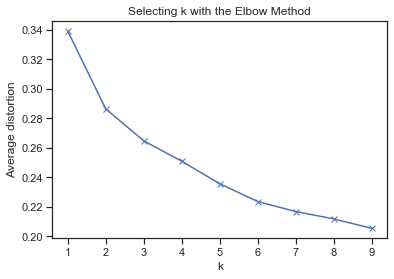

In [1816]:
#The Elbow method

#https://www.packtpub.com/big-data-and-business-intelligence/mastering-machine-learning-scikit-learn#

#http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Computes distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

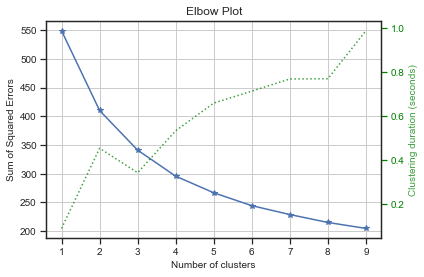

In [1817]:
#using scikit-plot python package (https://github.com/reiinakano/scikit-plot) ... you need to install 
# !pip install scikit-plot

import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=range(1, 10))

The graph suggest that 4 or 5 is a good value for K - The average distortion improves rapidly as we increase from 1 to 2, 2 to 3, and 3 to 4 . - There is little improvement for values of greater than 6.

### The Sihouette Method

In [1818]:
#read this page ... https://github.com/scikit-learn/scikit-learn/blob/master/examples/cluster/plot_kmeans_silhouette_analysis.py

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

kmeans_model = KMeans(n_clusters=4, random_state=0).fit(df_norm)
labels = kmeans_model.labels_
metrics.silhouette_score(df_norm, labels, metric='euclidean')

0.24406324272903407

A higher Silhouette Coefficient score relates to a model with better defined clusters. 

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

We got a postive value but a score close to 0 so our model might some variables that might be close to overlapping. 

### Clustering analysis

In [1819]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#four clusters
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [1820]:
#clustering results
k_means.labels_

array([2, 2, 2, ..., 0, 1, 0])

In [1821]:
#cluster centroids or centers
k_means.cluster_centers_

array([[-2.02620261e-02, -1.98088469e-02, -2.81649924e-02,
        -7.70385665e-03, -1.32683012e-03, -2.48813793e-02,
        -2.95606276e-02, -2.30742354e-03,  4.65315571e-03,
        -2.52316320e-02, -6.68115095e-04,  1.25053964e-01,
        -2.78215834e-03, -4.35237321e-02,  2.50467714e-03,
        -1.33999331e-02, -8.44879941e-04, -5.36576338e-04],
       [-9.80268856e-02, -5.19566547e-04, -2.69681453e-02,
        -1.15476433e-02, -2.93092152e-03, -1.51692412e-02,
        -2.21374054e-02, -4.46709368e-03, -4.47099450e-03,
        -1.71632141e-02, -1.11530455e-03, -2.18568000e-01,
        -4.81719260e-03, -3.48825611e-03, -5.95845665e-03,
        -2.24524603e-02,  1.63911474e-04, -9.28755704e-05],
       [ 2.44421703e-01,  3.97141302e-02, -2.24927810e-02,
         3.65274977e-02,  7.58412362e-03,  8.68600481e-02,
         1.00553747e-01,  1.23205596e-02, -4.91173403e-04,
         8.75893736e-02,  4.08827403e-03,  1.61874097e-01,
         1.41661419e-02,  9.72437912e-02,  5.69340045e

In [1822]:
#To add cluster label into the dataset as a column
df2 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df2.head()

,cluster
0,2
1,2
2,2
3,3
4,2


In [1823]:
df8 = df8.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

df3 = df8.join(df2) # this joins the cluster column with the rest of the table
df3.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,2
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,2
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,2
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,3
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,2


### Interpretation of Clustering Analysis

#### How many observations are there in cluster?

In [1824]:
#Number of observations in the clusters 
df3.groupby(['cluster']).size() 

cluster
0    1589
1    1294
2     584
3     152
dtype: int64

#### What is the profile of each cluster?

In [1825]:
#K-mean clustering analysis
df3.groupby(['cluster']).mean()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment
cluster,,,,,,,,,,,,,,,,,,
0,151.731907,103.808055,154.212083,599.499056,7021.900566,3.340599e+07,54500.900566,10166.741347,1.573946,206.950283,3.912996e+07,2008.387665,1665.166772,6.102391,2.151938,4747.333543,-5.723978e+06,103.285945
1,88.664606,109.459815,181.739567,511.091963,5995.282071,4.079212e+07,67043.718702,8748.421175,1.181607,247.744204,3.366732e+07,1996.360896,1386.367079,6.410665,2.026515,1588.001546,7.124801e+06,422.505820
2,366.390411,121.248288,284.672945,1616.820205,12724.910959,1.183860e+08,274351.645548,19773.376712,1.352740,777.373288,9.723164e+07,2009.676370,3987.083904,7.186301,2.199195,35994.863014,2.115434e+07,1778.707777
3,255.138158,126.875000,14842.105263,1662.190789,14068.197368,9.455270e+07,292249.756579,21410.809211,1.000000,705.407895,5.671711e+07,2001.611842,4192.598684,7.292763,2.154342,22932.526316,3.783560e+07,139.855178


In [1826]:
# Mean values for imdb_score in each cluster

df3.groupby('cluster')['imdb_score'].mean().sort_values(ascending=False)

cluster
3    7.292763
2    7.186301
1    6.410665
0    6.102391
Name: imdb_score, dtype: float64

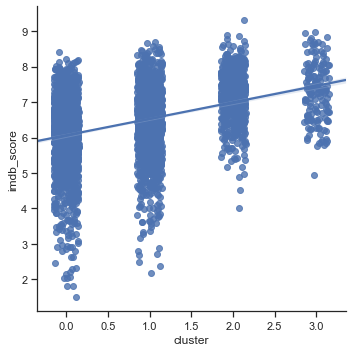

In [1827]:
#visualize it 
sns.lmplot("cluster", "imdb_score", df3, x_jitter=.15, y_jitter=.15)

In [1828]:
# Mean values for num_critic_for_reviews in each cluster
df3.groupby('cluster')['num_critic_for_reviews'].mean()

cluster
0    151.731907
1     88.664606
2    366.390411
3    255.138158
Name: num_critic_for_reviews, dtype: float64

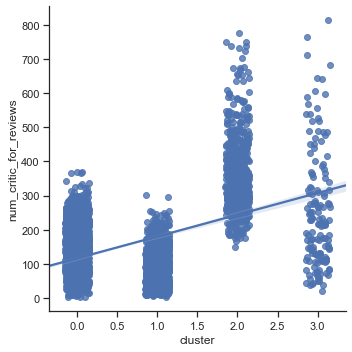

In [1829]:
#visualize it 
sns.lmplot("cluster", "num_critic_for_reviews", df3, x_jitter=.15, y_jitter=.15)

In [1830]:
# Mean values for movie_facebook_likes in each cluster
df3.groupby('cluster')['movie_facebook_likes'].mean()

cluster
0     4747.333543
1     1588.001546
2    35994.863014
3    22932.526316
Name: movie_facebook_likes, dtype: float64

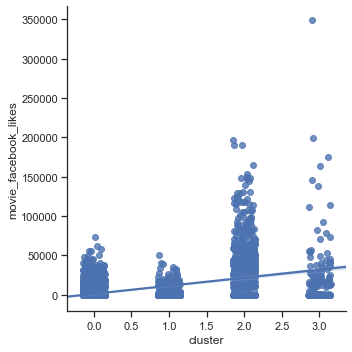

In [1831]:
#visualize it 
sns.lmplot("cluster", "movie_facebook_likes", df3, x_jitter=.15, y_jitter=.15)


CLuster Profiling 
Variables placed in cluster based on order of the value (higher, high, low, and lower value)
cluster 0:
- higher (facenumber_in_poster) 
- high (title_year)
- low(num_critic_for_reviews, actor_3_facebook_likes, actor_1_facebook_likes, cast_total_facebook_likes, budget, actor_2_facebook_likes, movie_facebook_likes)
- lower (duration, director_facebook_likes, gross, num_voted_users, num_user_for_reviews, profit, return_on_investment, imdb_score)

cluster 1:
- higher (profit)
- high (return_on_investment)
- low (duration, director_facebook_likes, gross, num_voted_users, facenumber_in_poster, num_user_for_reviews, imdb_score)
- lower(num_critic_for_reviews, actor_3_facebook_likes, actor_1_facebook_likes, cast_total_facebook_likes, budget, title_year, actor_2_facebook_likes, movie_facebook_likes)

cluster 2: 
- higher (num_critic_for_reviews, title_year, movie_facebook_likes, return_on_investment)
- high (duration, director_facebook_likes, actor_3_facebook_likes, actor_1_facebook_likes, num_voted_users, cast_total_facebook_likes, facenumber_in_poster, budget, actor_2_facebook_likes, imdb_score)
- low (profit)
- lower (gross, num_user_for_reviews)
cluster 3:
- higher (duration, director_facebook_likes, actor_3_facebook_likes, actor_1_facebook_likes, gross, num_voted_users, cast_total_facebook_likes, budget, actor_2_facebook_likes, imdb_score)
- high (num_critic_for_reviews, num_user_for_reviews, movie_facebook_likes, profit) 
- low (title_year, return_on_investment)
- lower (facenumber_in_poster)

This results shows "Aspect ratio" is NOT an important factor since about the equal number of Aspect ratio value belong to clusters as indicated by the fact that the mean of Aspect ratio in each cluster is almost same.


That is the Break down of the clusters. Cluster 0 and 1 seem to have more low and lower value variable, while cluster 2 and 3 consists of varaibles that have high or higher value when compare with other clusters. That might explain the postive correlation. 

### Build randomforestclassifier model for feature importance

In [1832]:
# Basic info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3619 entries, 0 to 3618
Data columns (total 19 columns):
num_critic_for_reviews       3619 non-null float64
duration                     3619 non-null float64
director_facebook_likes      3619 non-null float64
actor_3_facebook_likes       3619 non-null float64
actor_1_facebook_likes       3619 non-null float64
gross                        3619 non-null float64
num_voted_users              3619 non-null int64
cast_total_facebook_likes    3619 non-null int64
facenumber_in_poster         3619 non-null float64
num_user_for_reviews         3619 non-null float64
budget                       3619 non-null float64
title_year                   3619 non-null float64
actor_2_facebook_likes       3619 non-null float64
imdb_score                   3619 non-null float64
aspect_ratio                 3619 non-null float64
movie_facebook_likes         3619 non-null int64
profit                       3619 non-null float64
return_on_investment         361

In [1833]:
# declare X variables and y variable

y =  df3['cluster']
X = df3.drop('cluster', axis = 1)

print(y.shape, X.shape)

(3619,) (3619, 18)


In [1834]:
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y) # check the accuracy on the training set

1.0

In [1835]:
# Shows us the important predictors 
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})


,feature,importance
0,num_critic_for_reviews,0.143580
1,duration,0.015464
2,director_facebook_likes,0.087630
3,actor_3_facebook_likes,0.008655
4,actor_1_facebook_likes,0.007318
5,gross,0.021382
6,num_voted_users,0.067544
7,cast_total_facebook_likes,0.008788
8,facenumber_in_poster,0.004821
9,num_user_for_reviews,0.038960


Top 3 predictors:
    1. num_critic_for_reviews
    2. duration
    3. director_facebook_likes



### Clustering analysis using AgglomerativeClustering (# of clusters = 4)

In [1836]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)
agg.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

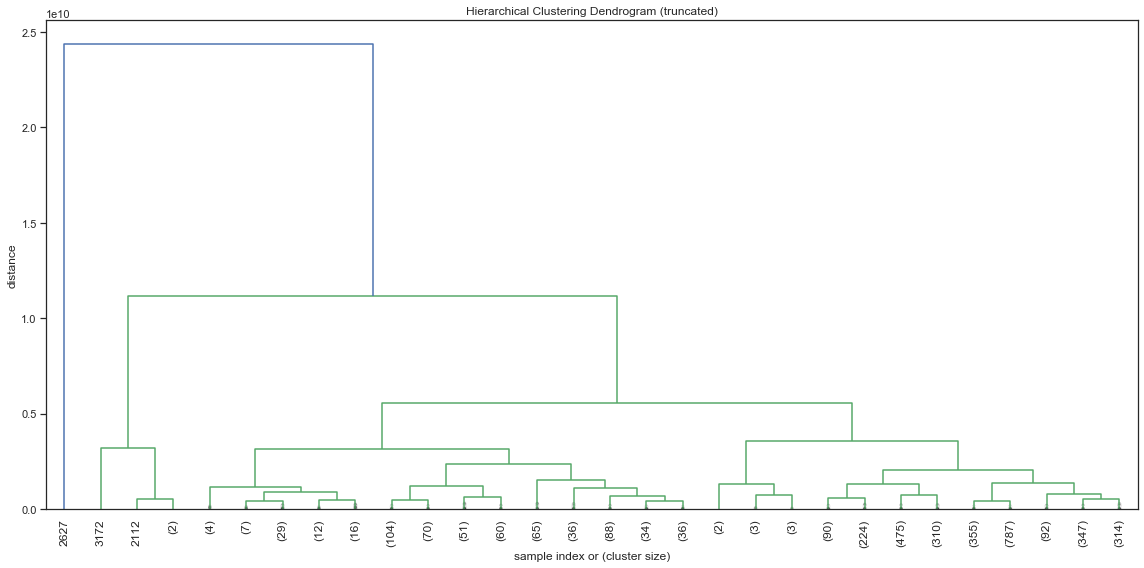

In [1837]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=30,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

#### How many observations are in each cluster?

In [1838]:
#To add cluster label into the dataset as a column
df4 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df4.head()

,cluster
0,1
1,1
2,1
3,1
4,1


In [1839]:
# joining two dataframes
df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)

df5 = df8.join(df4)
df5.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,return_on_investment,cluster
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,220.888543,1
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,3.134717,1
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,-18.337071,1
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,79.252257,1
4,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,-72.294775,1


In [1840]:
# this the number of observation for each cluster.
df5.groupby('cluster').size()

cluster
0    3002
1     612
2       4
3       1
dtype: int64

## Storytelling

We were given a dataset by our clients requesting identify predictors that will be useful in predicting whether movie would be successful or not and if so, how successful would the movie be in regards to the IMDB score. To find the answer we built regression models, classification models and clustering algorithm. 

**Regression:**
We started building regression using different regression algorithms. We wanted to understand how our X the independent variables would impact dependent variable the IMDB score. To find the impactful independent variables we deployed a Random Forest Regressor algorithm that would help us identify the top Impactful predictors.
We first started by running a random forest regressor algorithm with all the independent variable. The result of that the model was 93.7% accuracy and with MSE of just 0.069. Unexpectedly high what we wanted in a model but there was just a lot of predictors.  By having to many predictors, it will be costly to collect and maintain that data. So, we used the feature selection of a random forest regressor and decided to use the top 7 predictors instead of using all 17 predictors.  Taking the 7 predictors to predict the IMDB score we built different regression models. Here are the regression models and results:
1.	Multiple regression line using scikit-learn
Results: Accuracy of Multiple regression model is just 34% and MSE of just .72
2.	Lasso Model
Results: Accuracy of Lasso model is just 31% and MSE of just .75
3.	Ridge 
Results: Accuracy of Ridge model is just 33% and MSE of just .072
4.	Random Forest
Results: Accuracy of Random Forest regression model is 93% and MSE of just .069
5.	Using the feature selection regression, we got are the top 3 predictors
    1.	Num_voted_users 
    2.	Duration
    3.	Budget
   
  ***THe best model for Regression is Random Forest.** 

**Classification model:**
The Classification is a model that separates different classes in y value. This model is able to select important X variables, provides us with decision rules that are easy to understand and execute. For the classification model we decided to convert the IMBD score to categorical variable like is the movie good or bad. We used feature selection to select the 7 predictors to use as X. The classifier model we used was:
1.	Decision tree 
    - Results: Decision Tree accuracy was 70% for this model.
    Confusion Matrix:
        1. out of 0 bad movies 0 correctly classified as bad and the rest was Misclassified 
        2. out of 268 ok movies 134 correctly classified as ok and the rest was Misclassified 
        3. out of 796 good movies 611 correctly classified as good and the rest was Misclassified 
        4. out of 22 excellent movies 16 correctly classified as excellent and the rest was Misclassified
2.  10-fold cross-validation
    - While evaluating the decision tree model using 10-fold cross-validation we get a accuracy rate of 65%
3.  KNN
    - Results: KNN accuracy was 62% for this model.

4.  Confusion Matrix:
        1. out of 8 bad movies 1 correctly classified as bad and the rest was Misclassified 
        2. out of 248 ok movies 95 correctly classified as ok and the rest was Misclassified 
        3. out of 826 good movies 584 correctly classified as good and the rest was Misclassified 
        4. out of 4 excellent movies 0 correctly classified as excellent and the rest was Misclassified
5.  Random Forest Classifier 
    - Results: Random Forest Classifier accuracy was 75% for this model.
    Confusion Matrix:
        1. out of 5 bad movies 1 correctly classified as bad and the rest was Misclassified 
        2. out of 286 ok movies 173 correctly classified as ok and the rest was Misclassified 
        3. out of 776 good movies 633 correctly classified as good and the rest was Misclassified 
        4. out of 19 excellent movies 16 correctly classified as excellent and the rest was Misclassified
        
6. ExtraTreesClassifier for Feature Selection
   - Results: Top 3 predictors using a classifer Feature Selection
        1.	num_voted_users
        2.	duration
        3.	num_critic_for_reviews
        
      **Best model for just Classification model is Random Forest Classifier.** 
**Cluster**
For the clustering session we first normalize the data so all the variables have equal impact. I used the elbow method to find the good value for k. The result I got was to set the cluster as 4 or 5. I used the Silhouette method to see if my clusters would be better defined cluster. I got a score of .24. For the profile of cluster I saw that cluster 0 and 1 had a lot of low valued variables. Cluster 2 and 3 had higher valued variables. I used the randomforestclassifier model to find important predictors:
Top 3 predictors:
1.	num_critic_for_reviews
2.	duration
3.	director_facebook_likes

Based on these different models I would recommand them to use Random forest regression model bescause it has the most accuracy and low MSE. The variable that I would recommand that we should be looking at is the duration variable beacuse it is the only variable has been in 2nd place all 3 of the analysis. Other variables I found to be important when I was doing the analysis was  num_voted_users, num_critic_for_reviews, num_user_for_reviews, title_year, Gross and movie_facebook_likes. If clients are able to pay attention to those variables they are more likely to produce a successful movie. My advise would be to advertise well ahead of time not like nation tv ad telecast but to connect with the audience over social media. Social media allows them to crtic, like and share there thought proccess about you with there peers. The thing I would have liked to have data about would be on the current movie trend like people intrested in zombie movies or the is the trend superhero movies. What demographics of people go to the movies and what or who do they like. I know that the Asian market is big on superhero movies. 


In [1843]:
!pip install RISE

Error processing line 7 of C:\Anaconda\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\Anaconda\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


## Reference: 

http://rstudio-pubs-static.s3.amazonaws.com/342210_7c8d57cfdd784cf58dc077d3eb7a2ca3.html